# Linear Regression with Sentiments

In [2]:
import requests
import bs4
import urllib
import webbrowser
import re
import csv
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
from matplotlib import pyplot as plt
import datetime
from datetime import date
import time
import seaborn as sns
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from pycorenlp import StanfordCoreNLP
nltk.download('vader_lexicon')
sia=SIA()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jains\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
df_sa = pd.read_csv('GoogleSentiments.csv',index_col=[0])

In [7]:
df = pd.read_csv("Google.csv",index_col = 0)
datetime.datetime.strptime(df['Date'][0],'%b %d, %Y')
df.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%b %d, %Y')
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]
df.sort_values(by='date', inplace=True, ascending=True)
df['low'] = df['low'].astype(float)
df['open'] = df['open'].astype(float)
df['high'] = df['high'].astype(float)
df['adj_close**'] = df['adj_close**'].astype(float)
df.drop(['close*'],axis = 1,inplace = True)
df.drop(['volume'],axis = 1, inplace = True)

In [8]:
df

date     open     high      low  adj_close**
0   2019-05-31  1105.64  1113.40  1103.35      1106.50
1   2019-06-03  1066.93  1067.00  1027.03      1038.74
2   2019-06-04  1044.49  1058.44  1036.03      1054.49
3   2019-06-05  1055.00  1056.81  1033.00      1044.64
4   2019-06-06  1046.21  1050.00  1035.51      1047.76
..         ...      ...      ...      ...          ...
163 2020-01-24   995.15  1009.90   991.55       992.49
164 2020-01-27   985.00  1005.00   985.00       986.57
165 2020-01-28   985.00  1005.95   981.00       983.28
166 2020-01-29   986.00   999.80   985.00       983.63
167 2020-01-30   993.70   993.70   976.90       976.97

[168 rows x 5 columns]

In [9]:
final_scores = df_sa.iloc[:,0].values

In [29]:
df_linear = df



In [30]:
df_linear= df_linear[:-2]

In [31]:
df_linear

date     open     high      low  adj_close**
0   2019-05-31  1105.64  1113.40  1103.35      1106.50
1   2019-06-03  1066.93  1067.00  1027.03      1038.74
2   2019-06-04  1044.49  1058.44  1036.03      1054.49
3   2019-06-05  1055.00  1056.81  1033.00      1044.64
4   2019-06-06  1046.21  1050.00  1035.51      1047.76
5   2019-06-07  1054.28  1073.43  1051.15      1068.37
6   2019-06-10  1077.00  1094.84  1075.28      1082.76
7   2019-06-11  1096.99  1104.01  1079.57      1081.04
8   2019-06-12  1079.95  1082.52  1069.60      1079.10
9   2019-06-13  1084.71  1096.59  1082.57      1091.01
10  2019-06-14  1089.74  1094.76  1081.48      1086.30
11  2019-06-17  1089.10  1101.28  1088.00      1093.89
12  2019-06-18  1111.50  1118.78  1100.79      1105.24
13  2019-06-19  1107.24  1109.43  1096.03      1104.51
14  2019-06-20  1121.70  1122.72  1107.00      1113.20
15  2019-06-21  1109.86  1126.57  1109.72      1125.37
16  2019-06-24  1120.00  1123.57  1113.31      1116.70
17  2019-06-25  1115.08  1115.70  1084.60      1087.58
18  2019-06-26  1091.00  1095.12  1073.69      1080.32
19  2019-06-27  1086.75  1088.46  1075.85      1076.63
20  2019-06-28  1077.23  1082.80  1073.80      1082.80
21  2019-07-01  1101.04  1108.59  1095.33      1100.00
22  2019-07-02  1104.83  1112.89  1099.67      1112.60
23  2019-07-03  1118.50  1127.99  1114.85      1122.99
24  2019-07-05  1119.37  1134.65  1117.50      1132.67
25  2019-07-08  1125.87  1127.21  1111.76      1116.79
26  2019-07-09  1110.32  1127.86  1107.15      1124.29
27  2019-07-10  1132.32  1142.34  1130.66      1140.91
28  2019-07-11  1146.16  1153.24  1139.53      1144.08
29  2019-07-12  1142.93  1147.50  1138.56      1145.34
30  2019-07-15  1145.34  1150.68  1140.00      1150.51
31  2019-07-16  1146.73  1158.58  1146.73      1153.46
32  2019-07-17  1150.92  1158.44  1146.62      1146.74
33  2019-07-18  1142.00  1148.17  1132.86      1147.24
34  2019-07-19  1149.32  1151.58  1131.25      1131.55
35  2019-07-22  1135.47  1140.02  1125.21      1139.21
36  2019-07-23  1143.45  1148.86  1132.85      1148.05
37  2019-07-24  1132.62  1145.46  1128.51      1139.73
38  2019-07-25  1138.95  1143.59  1123.71      1135.94
39  2019-07-26  1228.00  1268.39  1228.00      1245.22
40  2019-07-29  1242.50  1248.99  1230.20      1241.84
41  2019-07-30  1227.00  1236.91  1225.32      1228.00
42  2019-07-31  1224.87  1234.91  1208.18      1218.20
43  2019-08-01  1217.63  1236.30  1207.00      1211.78
44  2019-08-02  1203.00  1209.50  1190.00      1196.32
45  2019-08-05  1172.97  1176.88  1142.75      1154.75
46  2019-08-06  1165.52  1181.40  1161.53      1171.08
47  2019-08-07  1157.80  1179.87  1150.84      1175.91
48  2019-08-08  1186.43  1206.28  1174.00      1206.19
49  2019-08-09  1199.99  1204.46  1184.89      1188.90
50  2019-08-12  1180.00  1185.61  1168.72      1174.50
51  2019-08-13  1174.35  1205.43  1172.99      1196.73
52  2019-08-14  1176.07  1182.79  1161.07      1164.25
53  2019-08-15  1168.43  1176.42  1163.00      1169.32
54  2019-08-16  1180.79  1183.84  1173.00      1179.21
55  2019-08-19  1191.83  1209.39  1190.40      1200.44
56  2019-08-20  1195.35  1198.00  1183.05      1183.53
57  2019-08-21  1195.82  1200.56  1187.92      1191.58
58  2019-08-22  1193.80  1198.78  1178.91      1191.52
59  2019-08-23  1185.17  1195.67  1150.00      1153.58
60  2019-08-26  1159.45  1171.86  1154.85      1171.18
61  2019-08-27  1183.00  1185.00  1164.56      1170.82
62  2019-08-28  1164.87  1178.50  1160.25      1173.75
63  2019-08-29  1186.42  1199.19  1185.28      1194.24
64  2019-08-30  1200.35  1200.35  1185.72      1190.53
65  2019-09-03  1181.85  1189.08  1163.71      1169.55
66  2019-09-04  1179.45  1184.88  1171.53      1182.27
67  2019-09-05  1193.66  1214.00  1192.69      1212.19
68  2019-09-06  1209.14  1212.95  1203.26      1206.32
69  2019-09-09  1207.08  1220.55  1193.17      1205.27
70  2019-09-10  1196.09  1210.00  1196.01      1205.70
71  2019-09-11  1203.89  1222.47  1202.28      122

In [32]:
len(final_scores)

166

In [33]:
df_linear['sentiments'] = final_scores

<ipython-input-33-fb1375831b3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear['sentiments'] = final_scores


In [34]:
pd.set_option('display.max_rows', 200)
df_linear

date     open     high      low  adj_close**  sentiments
0   2019-05-31  1105.64  1113.40  1103.35      1106.50    0.500000
1   2019-06-03  1066.93  1067.00  1027.03      1038.74    2.000000
2   2019-06-04  1044.49  1058.44  1036.03      1054.49    0.000000
3   2019-06-05  1055.00  1056.81  1033.00      1044.64    2.000000
4   2019-06-06  1046.21  1050.00  1035.51      1047.76    3.000000
5   2019-06-07  1054.28  1073.43  1051.15      1068.37    2.000000
6   2019-06-10  1077.00  1094.84  1075.28      1082.76    1.000000
7   2019-06-11  1096.99  1104.01  1079.57      1081.04    1.000000
8   2019-06-12  1079.95  1082.52  1069.60      1079.10    1.000000
9   2019-06-13  1084.71  1096.59  1082.57      1091.01    1.000000
10  2019-06-14  1089.74  1094.76  1081.48      1086.30    1.000000
11  2019-06-17  1089.10  1101.28  1088.00      1093.89    2.000000
12  2019-06-18  1111.50  1118.78  1100.79      1105.24    1.000000
13  2019-06-19  1107.24  1109.43  1096.03      1104.51    0.500000
14  2019-06-20  1121.70  1122.72  1107.00      1113.20    1.000000
15  2019-06-21  1109.86  1126.57  1109.72      1125.37    0.000000
16  2019-06-24  1120.00  1123.57  1113.31      1116.70    1.000000
17  2019-06-25  1115.08  1115.70  1084.60      1087.58    0.333333
18  2019-06-26  1091.00  1095.12  1073.69      1080.32    1.500000
19  2019-06-27  1086.75  1088.46  1075.85      1076.63    1.000000
20  2019-06-28  1077.23  1082.80  1073.80      1082.80    2.000000
21  2019-07-01  1101.04  1108.59  1095.33      1100.00    0.000000
22  2019-07-02  1104.83  1112.89  1099.67      1112.60    1.000000
23  2019-07-03  1118.50  1127.99  1114.85      1122.99    2.000000
24  2019-07-05  1119.37  1134.65  1117.50      1132.67    2.000000
25  2019-07-08  1125.87  1127.21  1111.76      1116.79    1.000000
26  2019-07-09  1110.32  1127.86  1107.15      1124.29    1.000000
27  2019-07-10  1132.32  1142.34  1130.66      1140.91    1.000000
28  2019-07-11  1146.16  1153.24  1139.53      1144.08    1.000000
29  2019-07-12  1142.93  1147.50  1138.56      1145.34    1.000000
30  2019-07-15  1145.34  1150.68  1140.00      1150.51    1.666667
31  2019-07-16  1146.73  1158.58  1146.73      1153.46    2.000000
32  2019-07-17  1150.92  1158.44  1146.62      1146.74    2.000000
33  2019-07-18  1142.00  1148.17  1132.86      1147.24    1.000000
34  2019-07-19  1149.32  1151.58  1131.25      1131.55    1.000000
35  2019-07-22  1135.47  1140.02  1125.21      1139.21    1.333333
36  2019-07-23  1143.45  1148.86  1132.85      1148.05    1.500000
37  2019-07-24  1132.62  1145.46  1128.51      1139.73    1.000000
38  2019-07-25  1138.95  1143.59  1123.71      1135.94    2.000000
39  2019-07-26  1228.00  1268.39  1228.00      1245.22    2.000000
40  2019-07-29  1242.50  1248.99  1230.20      1241.84    1.500000
41  2019-07-30  1227.00  1236.91  1225.32      1228.00    1.000000
42  2019-07-31  1224.87  1234.91  1208.18      1218.20    1.000000
43  2019-08-01  1217.63  1236.30  1207.00      1211.78    1.000000
44  2019-08-02  1203.00  1209.50  1190.00      1196.32    2.000000
45  2019-08-05  1172.97  1176.88  1142.75      1154.75    2.000000
46  2019-08-06  1165.52  1181.40  1161.53      1171.08    0.500000
47  2019-08-07  1157.80  1179.87  1150.84      1175.91    0.666667
48  2019-08-08  1186.43  1206.28  1174.00      1206.19    1.000000
49  2019-08-09  1199.99  1204.46  1184.89      1188.90    1.000000
50  2019-08-12  1180.00  1185.61  1168.72      1174.50    2.000000
51  2019-08-13  1174.35  1205.43  1172.99      1196.73    0.000000
52  2019-08-14  1176.07  1182.79  1161.07      1164.25    1.000000
53  2019-08-15  1168.43  1176.42  1163.00      1169.32    2.000000
54  2019-08-16  1180.79  1183.84  1173.00      1179.21    2.000000
55  2019-08-19  1191.83  1209.39  1190.40      1200.44    2.000000
56  2019-08-20  1195.35  1198.00  1183.05      1183.53    2.000000
57  2019-08-21  1195.82  1200.56  1187.92      1191.58    1.333333
58  2019-08-22  1193.80  1198.78  1178.91      1191.52   

In [35]:
test_size = 0.2
num_test_linear = int(len(df_linear) * test_size)
num_train_linear = len(df_linear) - num_test_linear

In [36]:
scaler = StandardScaler()

In [37]:
df_linear = scaler.fit_transform(np.array(df_linear[['open','high','low','adj_close**','sentiments']]))

In [44]:
x_linear_train = df_linear[:num_train_linear,:]

In [39]:
x_linear_test = df_linear[num_train_linear:-1,:]

In [40]:
y_linear_test = df_linear[num_train_linear+1:, 1]

In [41]:
y_linear = df_linear[1:num_train_linear+1,1]

In [47]:
ds = pd.DataFrame({'date': df[num_train_linear+1:-2]['date'], 'high':  df_linear[num_train_linear+1:,1]})

In [48]:
ds

date      high
134 2019-12-13 -1.029890
135 2019-12-16 -0.987775
136 2019-12-17 -1.060193
137 2019-12-18 -1.133637
138 2019-12-19 -1.208623
139 2019-12-20 -1.236357
140 2019-12-23 -1.100767
141 2019-12-24 -1.216841
142 2019-12-26 -1.246629
143 2019-12-27 -1.236357
144 2019-12-30 -1.111039
145 2019-12-31 -1.090495
146 2020-01-01 -1.111039
147 2020-01-02 -1.135178
148 2020-01-03 -1.205541
149 2020-01-06 -1.359108
150 2020-01-07 -1.368352
151 2020-01-08 -1.628748
152 2020-01-09 -1.541949
153 2020-01-10 -1.306721
154 2020-01-13 -1.102821
155 2020-01-14 -1.113093
156 2020-01-15 -0.786444
157 2020-01-16 -0.361183
158 2020-01-17 -0.743301
159 2020-01-20 -0.887109
160 2020-01-21 -0.882487
161 2020-01-22 -0.957473
162 2020-01-23 -0.966717
163 2020-01-24 -0.978530
164 2020-01-27 -1.028863
165 2020-01-28 -1.019105

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [50]:
regressor.fit(x_linear_train, y_linear)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
y_linear_pred = regressor.predict(x_linear_test)

In [52]:
est_linear_df = pd.DataFrame({'est': y_linear_pred.reshape(-1), 
                       'date': df[num_train_linear+1:-2]['date']})

Text(0, 0.5, 'USD')

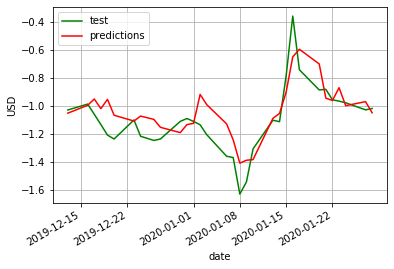

In [54]:
ax = ds.plot(x='date', y='high', style='g-', grid=True)
ax = est_linear_df.plot(x='date', y='est', style='r-', grid=True, ax=ax)
ax.legend(['test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

## Infosys

In [3]:
df_sa = pd.read_csv('InfosysSentiments.csv',index_col=[0])

In [6]:
df = pd.read_csv("Infosys.csv",index_col = 0)
datetime.datetime.strptime(df['Date'][0],'%b %d, %Y')
df.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%b %d, %Y')
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]
df.sort_values(by='date', inplace=True, ascending=True)
df['low'] = df['low'].astype(float)
df['open'] = df['open'].astype(float)
df['high'] = df['high'].astype(float)
df['adj_close**'] = df['adj_close**'].astype(float)
df.drop(['close*'],axis = 1,inplace = True)
df.drop(['volume'],axis = 1, inplace = True)

In [7]:
df

date    open    high     low  adj_close**
0   2019-06-03  729.80  750.90  729.00       717.59
1   2019-06-04  737.25  739.45  733.15       708.58
2   2019-06-06  736.50  744.65  733.65       708.87
3   2019-06-07  735.85  743.95  735.85       712.25
4   2019-06-10  740.10  754.10  740.10       726.12
..         ...     ...     ...     ...          ...
159 2020-01-27  779.05  784.80  774.40       778.10
160 2020-01-28  781.00  781.80  772.00       778.00
161 2020-01-29  786.60  792.80  784.25       789.70
162 2020-01-30  789.70  789.70  778.00       780.70
163 2020-01-31  780.55  784.95  771.60       775.95

[164 rows x 5 columns]

In [13]:
final_scores = df_sa.iloc[:,0].values
df_linear = df

In [14]:
len(final_scores)

164

In [16]:
df_linear['sentiments'] = final_scores

In [17]:
df_linear

date    open    high     low  adj_close**  sentiments
0   2019-06-03  729.80  750.90  729.00       717.59         2.0
1   2019-06-04  737.25  739.45  733.15       708.58         0.0
2   2019-06-06  736.50  744.65  733.65       708.87         3.0
3   2019-06-07  735.85  743.95  735.85       712.25         2.0
4   2019-06-10  740.10  754.10  740.10       726.12         1.0
..         ...     ...     ...     ...          ...         ...
159 2020-01-27  779.05  784.80  774.40       778.10         1.0
160 2020-01-28  781.00  781.80  772.00       778.00         1.0
161 2020-01-29  786.60  792.80  784.25       789.70         1.0
162 2020-01-30  789.70  789.70  778.00       780.70         1.0
163 2020-01-31  780.55  784.95  771.60       775.95         1.0

[164 rows x 6 columns]

In [18]:
test_size = 0.2
num_test_linear = int(len(df_linear) * test_size)
num_train_linear = len(df_linear) - num_test_linear

In [19]:
scaler = StandardScaler()

In [20]:
df_linear = scaler.fit_transform(np.array(df_linear[['open','high','low','adj_close**','sentiments']]))

In [21]:
x_linear_train = df_linear[:num_train_linear,:]
x_linear_test = df_linear[num_train_linear:-1,:]
y_linear_test = df_linear[num_train_linear+1:, 1]
y_linear = df_linear[1:num_train_linear+1,1]

In [22]:
ds = pd.DataFrame({'date': df[num_train_linear+1:]['date'], 'high':  df_linear[num_train_linear+1:,1]})

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [24]:
regressor.fit(x_linear_train, y_linear)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_linear_pred = regressor.predict(x_linear_test)

In [26]:
est_linear_df = pd.DataFrame({'est': y_linear_pred.reshape(-1), 
                       'date': df[num_train_linear+1:]['date']})

Text(0, 0.5, 'USD')

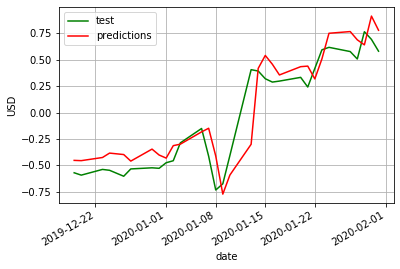

In [28]:
ax = ds.plot(x='date', y='high', style='g-', grid=True)
ax = est_linear_df.plot(x='date', y='est', style='r-', grid=True, ax=ax)
ax.legend(['test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [29]:
from sklearn.metrics import mean_squared_error
error_LR = mean_squared_error(y_linear_test,y_linear_pred)
print(error_LR)

0.040089529665670275


## Britannia

In [32]:
df_sa = pd.read_csv('BritanniaSentiments.csv',index_col=[0])
df = pd.read_csv("Britannia.csv",index_col = 0)
datetime.datetime.strptime(df['Date'][0],'%b %d, %Y')
df.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%b %d, %Y')
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]
df.sort_values(by='date', inplace=True, ascending=True)
df['low'] = df['low'].astype(float)
df['open'] = df['open'].astype(float)
df['high'] = df['high'].astype(float)
df['adj_close**'] = df['adj_close**'].astype(float)
df.drop(['close*'],axis = 1,inplace = True)
df.drop(['volume'],axis = 1, inplace = True)

In [33]:
final_scores = df_sa.iloc[:,0].values
df_linear = df

In [34]:
df_linear

date     open     high      low  adj_close**
0   2019-06-03  2936.00  3000.00  2935.90      2953.10
1   2019-06-04  2970.20  2985.00  2951.00      2946.04
2   2019-06-06  2965.30  2977.95  2881.80      2884.64
3   2019-06-07  2905.00  2919.30  2860.00      2882.61
4   2019-06-10  2909.70  3005.00  2909.70      2977.06
..         ...      ...      ...      ...          ...
159 2020-01-27  3187.00  3210.00  3155.00      3174.20
160 2020-01-28  3182.90  3209.90  3136.50      3181.25
161 2020-01-29  3200.00  3245.50  3190.05      3214.20
162 2020-01-30  3208.95  3234.70  3192.45      3210.70
163 2020-01-31  3242.70  3274.60  3186.85      3200.70

[164 rows x 5 columns]

In [35]:
len(final_scores)

164

In [36]:
df_linear['sentiments'] = final_scores

In [37]:
test_size = 0.2
num_test_linear = int(len(df_linear) * test_size)
num_train_linear = len(df_linear) - num_test_linear

In [38]:
scaler = StandardScaler()
df_linear = scaler.fit_transform(np.array(df_linear[['open','high','low','adj_close**','sentiments']]))

In [39]:
x_linear_train = df_linear[:num_train_linear,:]
x_linear_test = df_linear[num_train_linear:-1,:]
y_linear_test = df_linear[num_train_linear+1:, 1]
y_linear = df_linear[1:num_train_linear+1,1]

In [40]:
ds = pd.DataFrame({'date': df[num_train_linear+1:]['date'], 'high':  df_linear[num_train_linear+1:,1]})

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [42]:
regressor.fit(x_linear_train, y_linear)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
y_linear_pred = regressor.predict(x_linear_test)

Text(0, 0.5, 'USD')

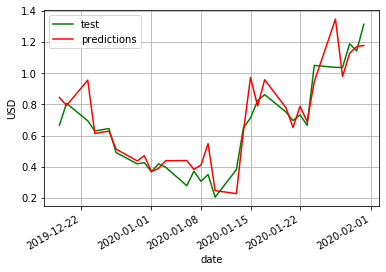

In [44]:
est_linear_df = pd.DataFrame({'est': y_linear_pred.reshape(-1), 
                       'date': df[num_train_linear+1:]['date']})
ax = ds.plot(x='date', y='high', style='g-', grid=True)
ax = est_linear_df.plot(x='date', y='est', style='r-', grid=True, ax=ax)
ax.legend(['test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [45]:
from sklearn.metrics import mean_squared_error
error_LR = mean_squared_error(y_linear_test,y_linear_pred)
print(error_LR)

0.013718696417690896
